In [28]:
%matplotlib inline

from datetime import datetime, date, time
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

In [17]:
DATE='20180510'
DPLUS=1
datafile = 'CAMS/regional/CAMS_WEB_FORECAST_%s_D+%d.csv.gz'
station_locations = 'CAMS/regional/CAMS_WEB_LOCATIONS_V1.csv'
path = datafile % (DATE, DPLUS)
!wc -l $path

4826 CAMS/regional/CAMS_WEB_FORECAST_20180510_D+1.csv.gz


Let's read the metadata information

In [19]:
locations = pd.read_csv(station_locations)
locations.head()

,ID,Name,Country,Latitude,Longitude
0,AMXX0003,Yerevan,Armenia,40.13,44.47
1,AMXX0001,Abovyan,Armenia,40.17,44.58
2,AMXX0002,Gyumri,Armenia,40.79,43.84
3,AUXX0097,Mattersburg,Austria,47.73,16.40
4,AUXX0100,Gussing,Austria,47.07,16.33


Find location ID of the city we are interested in

In [20]:
city = 'Paris'
locations[locations['Name'].str.contains(city)]

,ID,Name,Country,Latitude,Longitude
653,FRXX0077,Paris-Charles-De-Gaulle,France,48.87,2.33
710,FRXX0076,Paris,France,48.73,2.40


Read air quality forecast data file

In [22]:
aq_data = pd.read_csv(path, index_col=['ID', 'Date_Time'], parse_dates=[['Date','Time']] )
aq_data.head()

AQI     O3   NO2   SO2      CO   PM10   PM25
ID       Date_Time                                                        
ALXX0001 2018-05-11 01:00:00    2  49.31  2.23  0.96  160.87  12.79  11.84
         2018-05-11 02:00:00    2  47.74  1.91  0.94  161.70  13.38  11.97
         2018-05-11 03:00:00    2  46.72  1.64  0.93  162.34  13.64  11.91
         2018-05-11 04:00:00    2  44.59  1.46  1.10  163.71  14.06  11.78
         2018-05-11 05:00:00    2  52.69  1.74  1.30  165.78  14.29  11.01

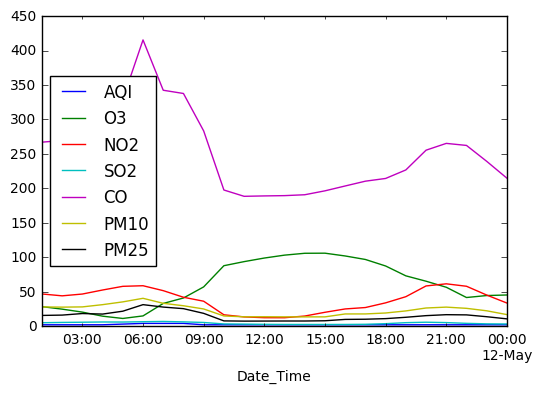

In [29]:
aq_data.loc['FRXX0077'].plot()